# 1. Loading Data and Importing Libraries

In [1]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)

In [4]:
print(df.shape)
df.head()

(3755, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


So, we have 9 columns with 3755 rows:

3 numeric columns : work_year, salary_in_usd,remote_ratio.

6 categorical columns : experience_level,employment_type, job_title, employee_residense, company_location, company_size.

In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values to deal with!

# 2. Univariate Analysis

## Dealing with Categorical features

###Experience Level

There's 4 categorical values  in column 'Experience Level', each are:


*  EN, which refers to Entry-level / Junior.

*   MI, which refers to Mid-level / Intermediate.

*   SE, which refers to Senior-level / Expert.

*   EX, which refers to Executive-level / Director.


In [6]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()

From treemap above, we observe that Senior-level/Expert accounts for the highest, and Mid-level/Intermediate ranked the next. 

Followed by Entry Level and surprisingly Executive at the end.

###Job Designation

In [7]:
print('Different job designations altogether :', len(set(df['job_title'])))

Different job designations altogether : 93


Next we will account for the most frequent job designations.

In [8]:
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

Data Engineer, Data Scientist are the top 2 as usual, followed by Data Analyst and Machine Learning Engineer.

Wordcloud of the Job Designations : 

In [9]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [10]:
def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

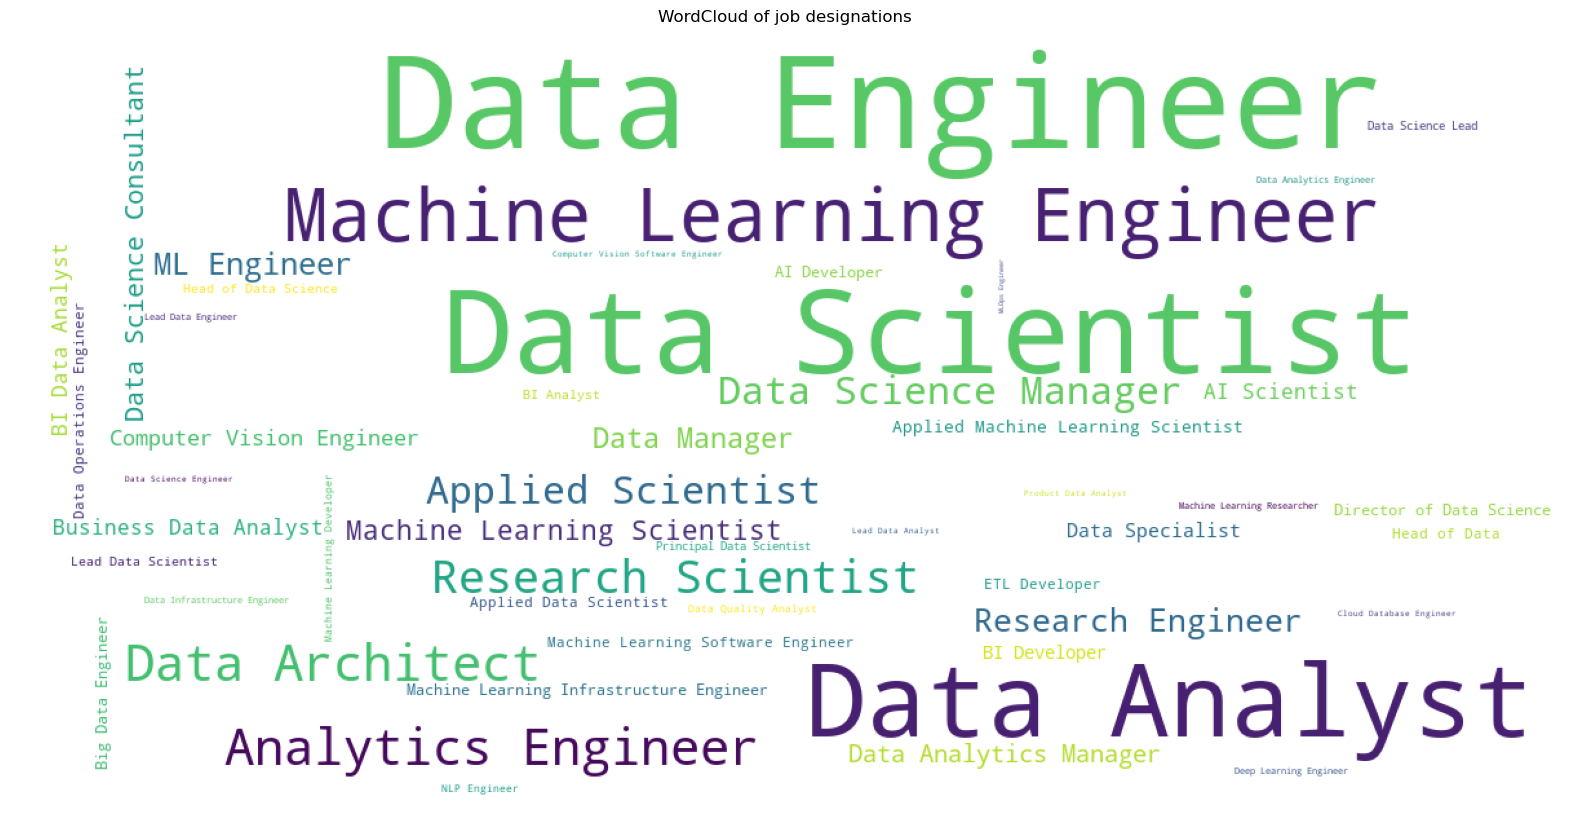

In [11]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of job designations')

### Employment Type

There are 4 employment types here : 


*   PT : Part-time

*   FT : Full-time

*   CT : Contract

*   FL : Freelance


In [12]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

Almost the entirety of employee type is full-time.

### Relation between Employee Residence and Company Location

In [13]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [14]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')
fig.show()

Most of the employees are from USA as can be seen from the chloropleth above.

In [15]:
top_15_emp_locations = residence[:15]
fig = px.bar(y = top_15_emp_locations.values, x = top_15_emp_locations.index, 
            color = top_15_emp_locations.index, text = top_15_emp_locations.values,
            title = 'Top 15 Locations of Employees')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "count")
fig.show()

In terms of number of employees, USA leads followed by GBR, ESP and then IND.

In [16]:
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
company_location = df['company_location'].value_counts()
top_15_company_location = company_location[:15]

fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence', 
           x = top_15_emp_locations.index, y = top_15_emp_locations.values,
           text = top_15_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_15_company_location.index, 
           y = top_15_company_location.values, text = top_15_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

fig.show()

As of 2023, most countries have similar number of employee residences and company locations.

### Company Size</div>

In [17]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

Company size mostly consists of medium sized comapnies and then the large sized ones followed by the small sized startups.

## Dealing with Numerical Features

### Work Year

In [18]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Work year distribution')
fig.show()

2023 year data accounts for about 47% in the dataset, followed by 2022 and so. Goes on to show the tremendous growth in this field through the years!

### Salary in USD

In [19]:
fig = px.box(y = df['salary_in_usd'], title = 'Salary in USD')
fig.show()

In [20]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

We observe that salary in USD is mostly distributed between 95/100k - 175/180k.

### Remote Ratio

Remote Ratio consists of 3 values : 


*   0 : No remote work (less than 20%) 

*   50 : Partially remote

*   100 : Fully remote (more than 80%)

In [21]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

As of 2023, Most companies still go the Fully Remote route, followed closely by the Hybrid/ Partially remote and then the No Remote policy.

# 3. Work Year Analysis

We do this to check whether remote ratio gets affected over time.

## Remote Ratio by Work Year

In [22]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()

As from the rader plot, we observe that : 

Remote work peaked during 2021 and that could be attributed to the pandemic. With time, no remote work policy has been applied again as it is the case for 2023.


#4. Experience Level Analysis

## Employment Type wrt Experience Level

In [23]:
exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_type['Entry-level/Junior'].index, 
           y = exp_type['Entry-level/Junior'].values, text = exp_type['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_type['Executive-level/Director'].index, 
           y = exp_type['Executive-level/Director'].values, text = exp_type['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_type['Mid-level/Intermediate'].index,
           y = exp_type['Mid-level/Intermediate'].values, text = exp_type['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_type['Senior-level/Expert'].index,
           y = exp_type['Senior-level/Expert'].values, text = exp_type['Senior-level/Expert'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level along with Employment Type')

fig.show()

In Full Time, Seniors are present in full force followed by executiuve and then the freshers.

## Top 5 Designations based on Experience

In [24]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:5]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()

**Observations**

*   Data Architect only has senior experienced people in them.

* Entry-level/Junior tends to have data analyst position more in comparison to the data scientist and data engineer and ML Engineer.

* Mid-level/Intermediate tends to have data sceintist and data engineer position rather than analyst.

* Obviously, there's no data scientist and analyst job with Executive-level/Director but tends to have data engineer and director position.



*   Research Scientist is only comprised of the mid level/intermediate position


## Company Size based on Experience 

In [25]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_size['Entry-level/Junior'].index,
           y = exp_size['Entry-level/Junior'].values, text = exp_size['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_size['Executive-level/Director'].index,
           y = exp_size['Executive-level/Director'].values, text = exp_size['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_size['Mid-level/Intermediate'].index,
           y = exp_size['Mid-level/Intermediate'].values, text = exp_size['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_size['Senior-level/Expert'].index,
           y = exp_size['Senior-level/Expert'].values, text = exp_size['Senior-level/Expert'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

** Observations  **:



*   For large sized companies, there's mostly seniors followed by the intermediate and then the freshers. Very few executives can be seen.

*   For medium sized companies, it primarily comprises of senior level then followed by the intermediate and then the entry levelers. Executive a bit prominent compared to that of the large sized companies.

*   For small sized companies / startups, we see it consists all three levels apart from executives proportionally.




# 5. Company Location Analysis

## Company Location based on Experience

In [26]:
exp_location = df.groupby(['experience_level','company_location']).size()

entry_location = exp_location['Entry-level/Junior']
executive_location = exp_location['Executive-level/Director']
mid_location = exp_location['Mid-level/Intermediate']
senior_location = exp_location['Senior-level/Expert']

fig1 = px.choropleth(locations = entry_location.index, color = entry_location.values,
                    title = 'Entry-level/Junior Company Location')

fig2 = px.choropleth(locations = mid_location.index, color = mid_location.values,
                    title = 'Mid-level/Intermediate Company Location')

fig3 = px.choropleth(locations = senior_location.index, color = senior_location.values,
                    title = 'Senior-level/Expert Company Location')

fig4 = px.choropleth(locations = executive_location.index, color = executive_location.values,
                    title = 'Executive-level/Director Company Location')

fig1.add_scattergeo(locations = entry_location.index, text = entry_location.values,  mode = 'text')
fig2.add_scattergeo(locations = mid_location.index, text = mid_location.values,  mode = 'text')
fig3.add_scattergeo(locations = senior_location.index, text = senior_location.values, mode = 'text')
fig4.add_scattergeo(locations = executive_location.index, text = executive_location.values,  mode = 'text')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

A higher level means tends to go to the United States
while lower levels often mean staying in one's own country. Even though this could be biased  since the number of workers in the data field is substantially high in USA compared to the other countries.

# 6. Salary Analysis

## Salary based on work year

In [27]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
 
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

There are higher salary amounts in 2023 and 2022 than the levels in 2021 and 2020.

The salary levels in 2021 and 2020 are about the same.

## Salary based on Experience

In [28]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))
                            
fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

We observe that the entry-level is distributed along with lower salaries while the executive-level is plotted along higher salaries.

## Salary based on Company Size

In [29]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

It is apparent that Medium sized of company is distributed along with higher salaries, and Large sized company has higher salaries than small size company.

Thus, we can get a conclusion as large size company not necessarily has higher salaries than medium sized company.

## Highest salaries based on Designation

In [30]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Top 25 Highest Salary by Designation')

Above are the 25 highest salaries listed through job designation.

## Average Salary based on Company Location

In [31]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Average Salary by Company Location')
fig.show()

We observe that higher average salaries have brighter colours while lower average salaries have darker colours. 

Here, we can see that USA and Russia have higher average salaries and brighter colours compared to the other countries.

Text(0.5, 1.0, 'Confusion Matrix')

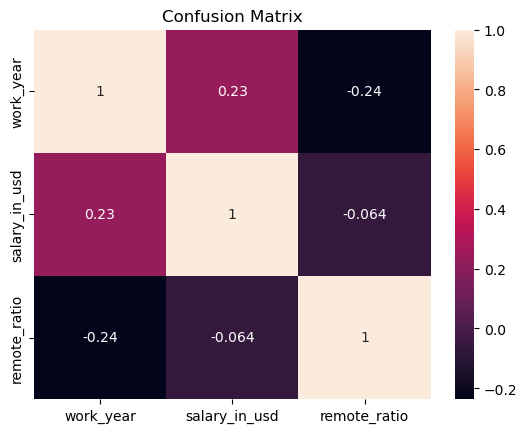

In [32]:
fig, ax = plt.subplots() 
sns.heatmap(df.corr(), annot = True)
plt.title('Confusion Matrix')

Thanks for sparing your time! Do upvote if you liked it, This motivates hugely to come up with new explorations and keep exploring new domains.

It would be really nice if you check my other works and if you like my work then don't forget to follow for more interesting notebooks 🤗